In [ ]:
import pymongo
conn = pymongo.MongoClient('mongodb://192.168.20.15', 27017)
db = conn.brewpiless
collection = db.beer    
 
beername = 'beertest'
beerstyle = ''
ret = ''      
if beername == '' and beerstyle == '':
   #busca tudo  
   ret = list(collection.find())
   if ret:
       print(ret)
       print('if')
elif beername != '':
    #busca NAME           
    ret = dict(collection.find_one({"beername": beername}))
    if ret:
       print(ret)          
       print('elif')

In [46]:
import pymongo
import datetime  
import time
conn = pymongo.MongoClient('mongodb://127.0.0.1', 27017)
db = conn.brewpiless
collection = db.beer
res2 = collection.find({"finished": ""}).distinct("beername")
res = list(res2) 
tudo = collection.find_one({"beername": res[0]})
tudodict = dict(tudo)
created = tudodict['created']
createdformat = created.strftime("%d/%m/%Y %H:%M:%S")

today = datetime.datetime.now() 
elapsedTime = str(today-created)
brewing = elapsedTime.replace(':','h')
days = brewing[0:13]+'m'

print()

19/03/2020 00:30:30


In [1]:
import pymongo
import numpy as np
import pandas as pd
conn = pymongo.MongoClient('mongodb://192.168.20.15', 27017)
db = conn.brewpiless
collection = db.brewpiless    
    
#convert entire collection to Pandas dataframe
dfbrew = pd.DataFrame(list(collection.find()))

In [2]:
dfbrew.head()

,_id,beername,created,beertemp,fridgetemp,beerset,fridgeset,temproom,tempaux,externalvolt,tempmode,modeinint,finished
0,5e770737133baf3112ece588,beertest,"22/03/2020, 17:34:44",22.9,24.1,21.0,11.7,None,None,None,C,b,NaN
1,5e770773133baf3112ece589,beertest,"22/03/2020, 17:35:44",22.8,24.1,21.0,11.7,None,None,None,C,b,NaN
2,5e7707af133baf3112ece58a,beertest,"22/03/2020, 17:36:44",22.8,24.1,21.0,11.7,None,None,None,C,b,NaN
3,5e7707eb133baf3112ece58b,beertest,"22/03/2020, 17:37:44",22.8,24.1,21.0,11.7,None,None,None,C,b,NaN
4,5e770827133baf3112ece58c,beertest,"22/03/2020, 17:38:44",22.8,24.1,21.0,11.7,None,None,None,C,b,NaN


In [27]:

dfbrew['created'] = pd.to_datetime(dfbrew['created'])
dfbrew['beertemp'] = dfbrew['beertemp'].astype('float') 
final_df = dfbrew.sort_values('created', ascending=True) 

<bound method NDFrame.head of                           _id  beername             created  beertemp  \
0    5e770737133baf3112ece588  beertest 2020-03-22 17:34:44      22.9   
1    5e770773133baf3112ece589  beertest 2020-03-22 17:35:44      22.8   
2    5e7707af133baf3112ece58a  beertest 2020-03-22 17:36:44      22.8   
3    5e7707eb133baf3112ece58b  beertest 2020-03-22 17:37:44      22.8   
4    5e770827133baf3112ece58c  beertest 2020-03-22 17:38:44      22.8   
..                        ...       ...                 ...       ...   
307  5e7892dd133baf3112ece6bb  beertest 2020-03-23 21:42:46      21.0   
308  5e789319133baf3112ece6bc  beertest 2020-03-23 21:43:43      20.9   
309  5e789355133baf3112ece6bd  beertest 2020-03-23 21:44:43      20.9   
310  5e789392133baf3112ece6be  beertest 2020-03-23 21:45:53      20.9   
311  5e7893ce133baf3112ece6bf  beertest 2020-03-23 21:46:43      20.9   

    fridgetemp beerset fridgeset temproom tempaux externalvolt tempmode  \
0         24.1    

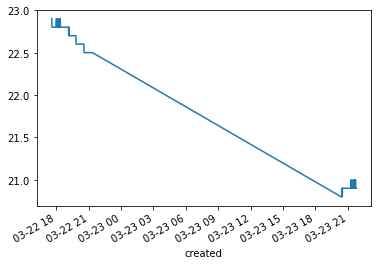

In [28]:
import matplotlib
dfbrew.index
dfbrew.set_index('created')['beertemp'].plot();

In [53]:
import pandas as pd

df = pd.read_excel (r'C:\Users\bceolincamar\Documents\GitHub\rubish.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   beertemp  199 non-null    float64       
 1   date      199 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


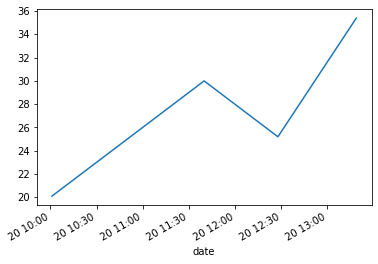

In [54]:
import matplotlib
df.index
df.set_index('date')['beertemp'].plot();

In [81]:


def gendata():
    conn = pymongo.MongoClient('mongodb://127.0.0.1', 27017)
    db = conn.brewpiless
    collection = db.brewpiless

    rdata = list(collection.find())
    if rdata: 
        # create an empty results object
        data_list = []
        # now loop through all of the documents in the cursor
        for doc in rdata: 
            value_list = [ doc['\ufeffbeertemp'], doc['date']]
            data_list.append(value_list)
        data = json.dumps(data_list)
        print(data)
    else:
        print("Cursor is empty")
        # return an empty result
        return "[]"


In [82]:
getdata()

'[["20.1", "20/03/2020 10:01"], ["20.2", "20/03/2020 10:02"], ["20.3", "20/03/2020 10:03"], ["20.4", "20/03/2020 10:04"], ["20.5", "20/03/2020 10:05"], ["20.6", "20/03/2020 10:06"], ["20.7", "20/03/2020 10:07"], ["20.8", "20/03/2020 10:08"], ["20.9", "20/03/2020 10:09"], ["21", "20/03/2020 10:10"], ["21.1", "20/03/2020 10:11"], ["21.2", "20/03/2020 10:12"], ["21.3", "20/03/2020 10:13"], ["21.4", "20/03/2020 10:14"], ["21.5", "20/03/2020 10:15"], ["21.6", "20/03/2020 10:16"], ["21.7", "20/03/2020 10:17"], ["21.8", "20/03/2020 10:18"], ["21.9", "20/03/2020 10:19"], ["22", "20/03/2020 10:20"], ["22.1", "20/03/2020 10:21"], ["22.2", "20/03/2020 10:22"], ["22.3", "20/03/2020 10:23"], ["22.4", "20/03/2020 10:24"], ["22.5", "20/03/2020 10:25"], ["22.6", "20/03/2020 10:26"], ["22.7", "20/03/2020 10:27"], ["22.8", "20/03/2020 10:28"], ["22.9", "20/03/2020 10:29"], ["23", "20/03/2020 10:30"], ["23.1", "20/03/2020 10:31"], ["23.2", "20/03/2020 10:32"], ["23.3", "20/03/2020 10:33"], ["23.4", "20/0